<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/Data_cleaning_manipulation_sbstep/blob/main/Notebooks/Your_dataset_import_and_manipulate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and merge database(s) 

Import libraries

In [91]:
import pandas as pd

### Using a csv file

File 1:

In [92]:
URL='https://raw.githubusercontent.com/MarceloPiemonteRibeiro/Data_cleaning_manipulation_sbstep/main/Data/ratings.csv'

In [93]:
rate=pd.read_csv(URL) 
rate.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Merge datasets:

File 2:

In [94]:
URL2='https://raw.githubusercontent.com/MarceloPiemonteRibeiro/Data_cleaning_manipulation_sbstep/main/Data/movies.csv'

In [95]:
movies=pd.read_csv(URL2)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [96]:
movies_rate = pd.merge(rate, movies)
movies_rate

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


Further references: 

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738

https://www.dataindependent.com/pandas/pandas-merge/

# Assesing your dataset

Create a DataFrame to keep your dataset

In [97]:
# create your DataFrame
df=pd.read_csv(URL)

## View your dataset

In [98]:
# see your DataFrame
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [99]:
# check the beginnning of your dataset partially
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [100]:
# check the end of your dataset - in this case the last 5 observations
df.tail(5)

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


Number of rows and columns:

In [101]:
df.shape

(100836, 4)

## Rename variables

In [102]:
# rename all variables
df.columns=["User", "Movie", "Rate","Time"]
df.head()

,User,Movie,Rate,Time
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Check only a given variable

In [103]:
df['Rate']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Rate, Length: 100836, dtype: float64

In [104]:
# alternatively
df.Rate 

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Rate, Length: 100836, dtype: float64

Unique values of the given variable

In [105]:
df['Rate'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Counting the obs of the unique values of the given variable

In [106]:
df['Rate'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Rate, dtype: int64

In [107]:
# alternatively
df.Rate.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Rate, dtype: int64

Analize just one variable filtered

In [108]:
df.query("Movie==1")

,User,Movie,Rate,Time
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Analize a specific feature of this variable

In [109]:
df.query("Movie==1").Rate

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: Rate, Length: 215, dtype: float64

# Statistical summary

Mean

In [110]:
df['Rate'].mean()

3.501556983616962

Mean and median

In [111]:
print("Mean:", df['Rate'].mean())
print("Median:", df['Rate'].median())

Mean: 3.501556983616962
Median: 3.5


Statistical summary of a given variable

In [112]:
df.Rate.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Rate, dtype: float64

Mean of a given variable filtered

In [113]:
df.query("Movie==1").Rate.mean()

3.9209302325581397

Mean of unique values of the variables

In [114]:
df.groupby("Movie")

In [115]:
df.groupby("Movie").mean()

,User,Rate,Time
Movie,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [116]:
df.groupby("Movie").Rate.mean()

Movie
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: Rate, Length: 9724, dtype: float64

In [117]:
mean_per_movie=df.groupby("Movie").Rate.mean()

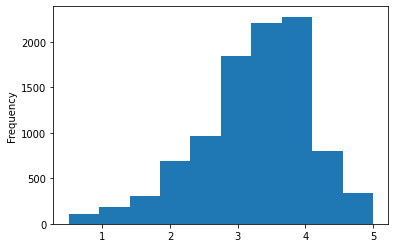

In [118]:
mean_per_movie.plot(kind='hist')

Using a new dataset

In [119]:
URL3='https://raw.githubusercontent.com/MarceloPiemonteRibeiro/Data_cleaning_manipulation_sbstep/main/Data/tmdb_5000_movies.csv'

In [120]:
tmdb = pd.read_csv(URL3)
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


Unique value of a categorical variable

In [121]:
tmdb.original_language.unique()
# nominal categorical variable, that is, no order like the ordinal category

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [122]:
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ar       2
ta       2
id       2
ro       2
cs       2
hu       1
tr       1
te       1
el       1
ky       1
af       1
sl       1
pl       1
xx       1
ps       1
nb       1
vi       1
is       1
no       1
Name: original_language, dtype: int64

Alternatively

In [123]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'ar', 'ta', 'id', 'ro', 'cs', 'hu',
       'tr', 'te', 'el', 'ky', 'af', 'sl', 'pl', 'xx', 'ps', 'nb', 'vi', 'is',
       'no'],
      dtype='object')

In [124]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

Transform series to dataframe

In [125]:
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


Add index

In [126]:
tmdb["original_language"].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [127]:
count_language=tmdb["original_language"].value_counts().to_frame().reset_index()
count_language.columns=["original_language","total"]
count_language.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


Print median formatted

In [128]:
Rates_movie1=df.query("Movie==1")
Rates_movie2=df.query("Movie==2")
print(len(Rates_movie1),len(Rates_movie2))

215 110


In [129]:
print("Median Rate movie 1: %.2f" % Rates_movie1.Rate.mean())
print("Median Rate movie 2: %.2f" % Rates_movie2.Rate.mean())

Median Rate movie 1: 3.92
Median Rate movie 2: 3.43


Creating random numbers

In [130]:
import numpy as np
np.array([2.5]*10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

Mean

In [131]:
np.array([2.5]*10).mean()

2.5

In [132]:
np.array([3.5]*10)

array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [133]:
filme1= np.append(np.array([2.5]*10), np.array([3.5]*10))
filme1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [134]:
filme2= np.append(np.array([5]*10), np.array([1]*10))
filme2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [135]:
print(filme1.mean(), filme2.mean())

3.0 3.0


In [136]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


Distance from de mean: Standard deviation

In [137]:
print(Rates_movie2.Rate.std(), Rates_movie1.Rate.std())


0.8817134921476455 0.8348591407114045


In [138]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))
print(np.std(filme1), np.std(filme2))

3.0 3.0
3.0 3.0
0.5 2.0


# Visualize

In [139]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


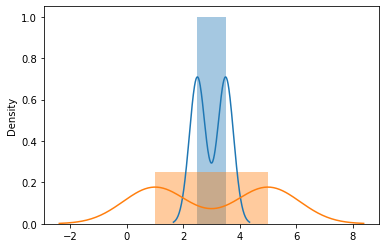

In [140]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

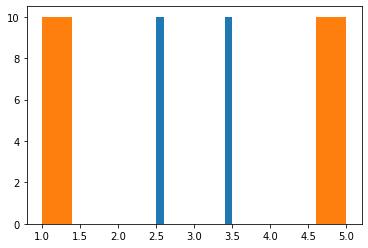

In [141]:
import matplotlib.pyplot as plt
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5a5a388d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5a5a394c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a5a399c10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5a5a3996d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5a5a394190>,
  <matplotlib.lines.Line2D at 0x7f5a5a321b10>]}

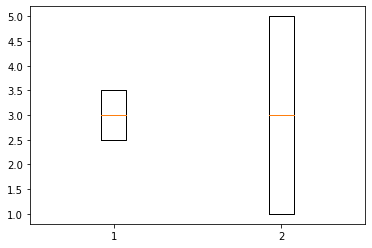

In [142]:
plt.boxplot([filme1, filme2])

About the count_language

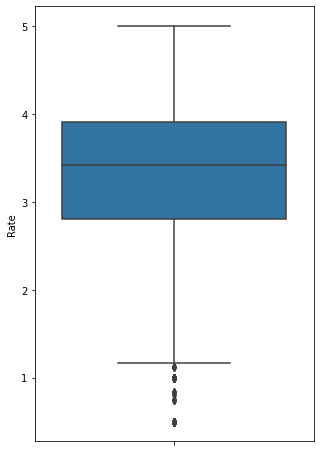

In [143]:
plt.figure (figsize=(5,8))
sns.boxplot(y=mean_per_movie)

Change the size of the graph with figsize

Text(0.5, 1.0, 'Histograma das medias dos filmes')

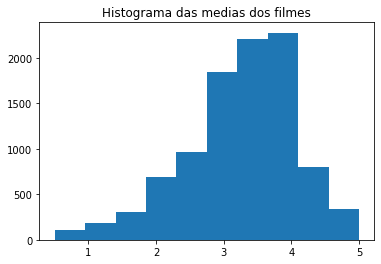

In [144]:

plt.hist(mean_per_movie)
plt.title("Histograma das medias dos filmes")

Use another library and add tittle

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


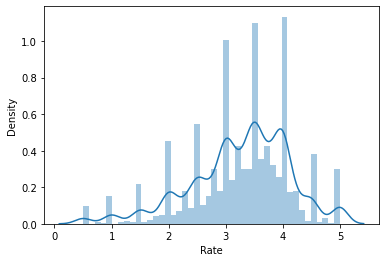

In [145]:
sns.distplot(mean_per_movie)

Change the n° of bins

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


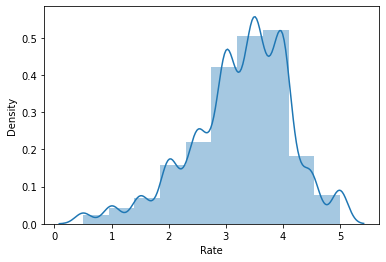

In [146]:
sns.distplot(mean_per_movie, bins=10)

Boxplot

In [147]:
# import library to use boxplot
import seaborn as sns

Boxplot vertical

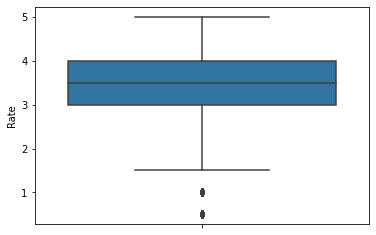

In [148]:
sns.boxplot (y=df.Rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


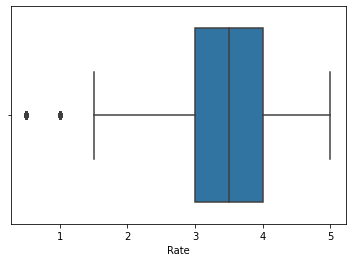

In [149]:
sns.boxplot (df.Rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


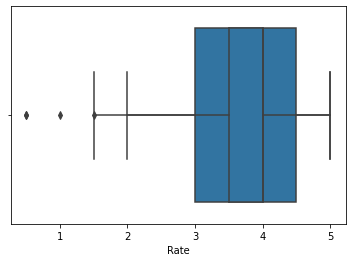

In [150]:
sns.boxplot(Rates_movie1.Rate)
sns.boxplot(Rates_movie2.Rate)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f5a59f79650>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5a59f7d610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a59f84650>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5a59f84110>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5a59f79b50>,
  <matplotlib.lines.Line2D at 0x7f5a59f8d650>]}

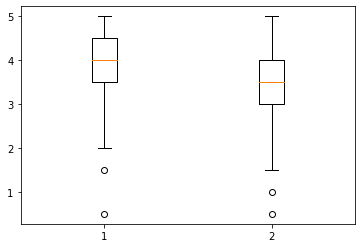

In [151]:
plt.boxplot([Rates_movie1.Rate, Rates_movie2.Rate])

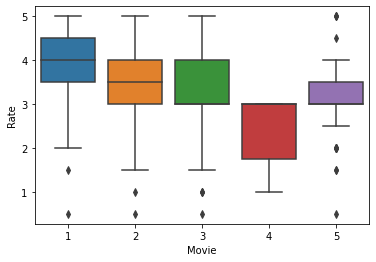

In [152]:
sns.boxplot(x="Movie", y="Rate", data=df.query("Movie in [1,2,3,4,5]"))

Histogram

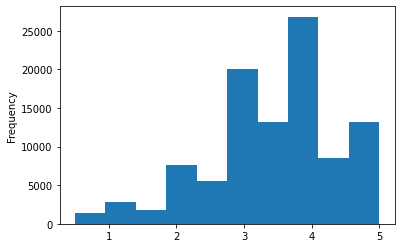

In [153]:
df.Rate.plot(kind='hist')

Automatic plot

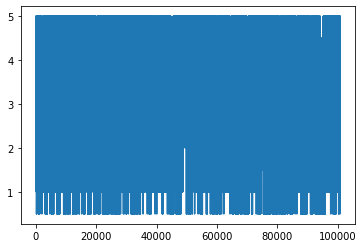

In [154]:
df.Rate.plot()

Another example:

In [155]:
tmdb.query("original_language!='en'").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


Pie chart

([<matplotlib.patches.Wedge at 0x7f5a59d2c2d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

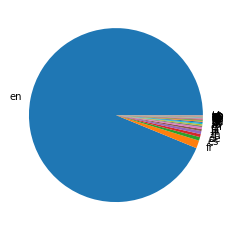

In [156]:
plt.pie(count_language["total"], labels = count_language["original_language"])

Focus just on english or other

Otheriwise, see english vs all others


In [157]:
total_per_language=tmdb["original_language"].value_counts()
total = total_per_language.sum()
total_english = total_per_language.loc["en"]
total_other=total-total_english
print(total_english, total_other)

4505 298


DataFrame:

In [158]:
data={
    'language':['english','other'],
    'total':[total_english,total_other] 
}

data

{'language': ['english', 'other'], 'total': [4505, 298]}

In [159]:
pd.DataFrame(data)

,language,total
0,english,4505
1,other,298


([<matplotlib.patches.Wedge at 0x7f5a59c99050>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'english'),
  Text(1.0791697511565306, -0.2130555049482467, 'other')])

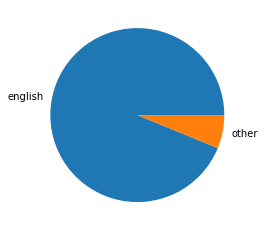

In [160]:
plt.pie(data["total"], labels = data["language"])

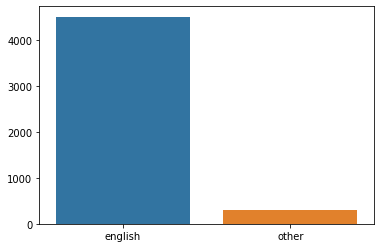

In [161]:
sns.barplot(x="language", y="total", data=data)

Focus on "other":

In [162]:
movies_not_english=tmdb.query("original_language!='en'").original_language.value_counts()
movies_not_english.head()

fr    70
es    32
de    27
zh    27
hi    19
Name: original_language, dtype: int64

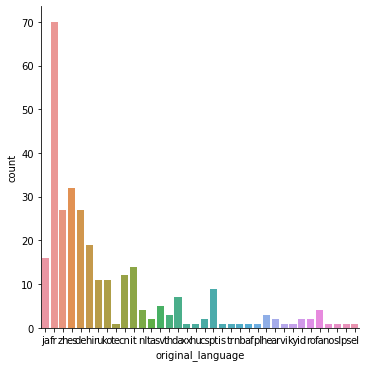

In [163]:
movies_not_english=tmdb.query("original_language!='en'")
sns.catplot(x="original_language",kind="count",
            data=movies_not_english)

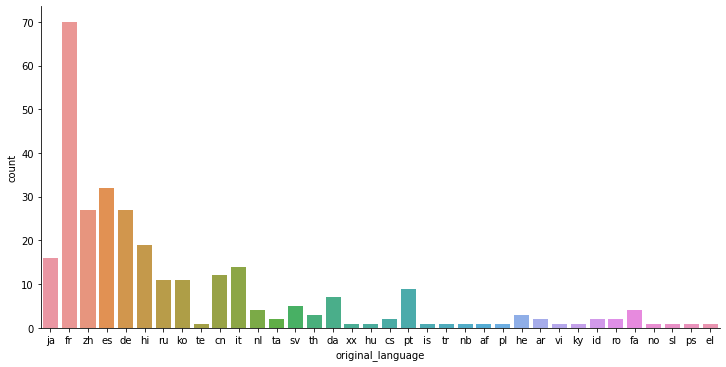

In [164]:
sns.catplot(x="original_language",kind="count",
            data=movies_not_english,
            aspect=2)

Ordering:

In [165]:
total_not_english = tmdb.query("original_language != 'en'").original_language.value_counts()
total_not_english.head()


fr    70
es    32
de    27
zh    27
hi    19
Name: original_language, dtype: int64

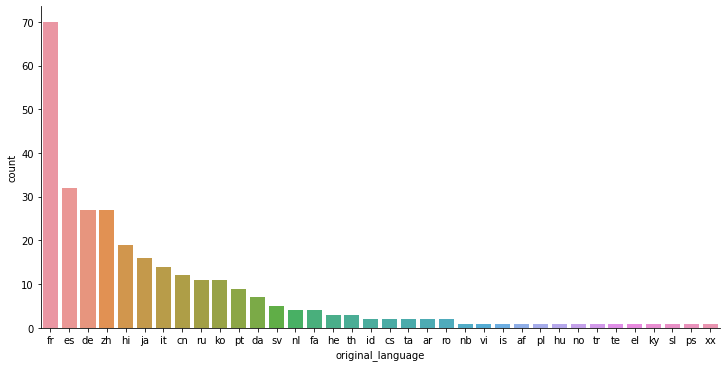

In [166]:
sns.catplot(x="original_language",kind="count",
            data=movies_not_english,
            aspect=2, order= total_not_english.index)

Change colors: https://seaborn.pydata.org/tutorial/color_palettes.html

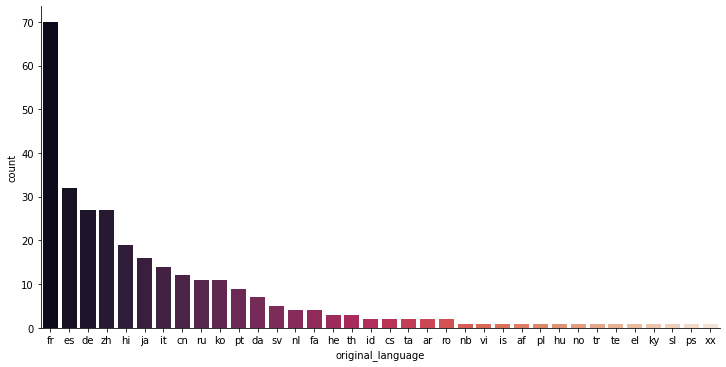

In [167]:
sns.catplot(x="original_language",kind="count",
            data=movies_not_english,
            aspect=2,palette="rocket", order= total_not_english.index)

Catplot

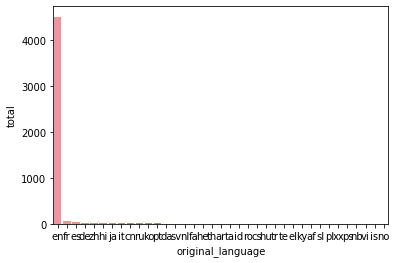

In [168]:
sns.barplot(x="original_language", y="total",data=count_language)

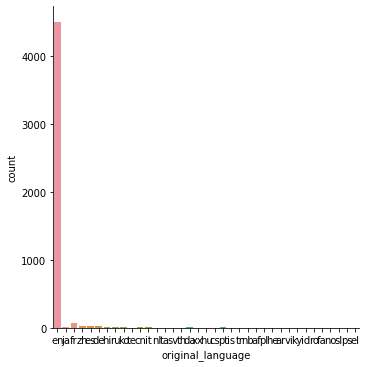

In [169]:
sns.catplot(x="original_language", kind="count", data=tmdb)

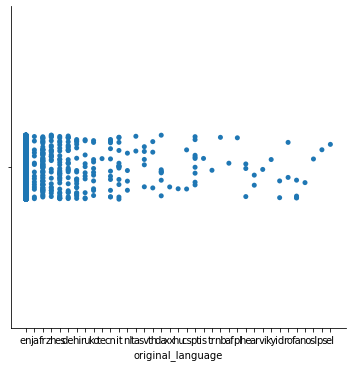

In [170]:
sns.catplot(x="original_language", data=tmdb)